### 1. IRIS data set

In [1]:
from sklearn.datasets import load_iris
iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)

In [2]:
sy = pd.Series(iris.target)

df['sp'] = sy
df = df.rename(index = str, columns = {'sepal length (cm)' : 'sl', 'sepal width (cm)' : 'sw', 
                                       'petal length (cm)' : 'pl', 'petal width (cm)' : 'pw'})
df.tail()

,sl,sw,pl,pw,sp
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2
149,5.9,3.0,5.1,1.8,2


In [3]:
X = df.drop(['sp'], axis = 1)
y = df['sp']

### 2. 모델 생성

In [5]:
# 모델 생성
from sklearn.naive_bayes import GaussianNB
model_norm = GaussianNB().fit(X, y)

In [6]:
# 모델 속성
print(model_norm.classes_) # 클래스 종류
print(model_norm.class_count_) # 각 클래스별 갯수
print(model_norm.class_prior_) # 각 클래스 확률

[0 1 2]
[50. 50. 50.]
[0.33333333 0.33333333 0.33333333]


In [7]:
# 클래스별 확률분포의 모수
print(model_norm.theta_[0], model_norm.sigma_[0])
print(model_norm.theta_[1], model_norm.sigma_[1])
print(model_norm.theta_[2], model_norm.sigma_[2])

[5.006 3.418 1.464 0.244] [0.121764 0.142276 0.029504 0.011264]
[5.936 2.77  4.26  1.326] [0.261104 0.0965   0.2164   0.038324]
[6.588 2.974 5.552 2.026] [0.396256 0.101924 0.298496 0.073924]


### 3. Predict

In [8]:
# predict 생성
y_pred = model_norm.predict_proba(X).round()
y_pred = pd.DataFrame(y_pred)
y_pred.head()

,0,1,2
0,1.0,0.0,0.0
1,1.0,0.0,0.0
2,1.0,0.0,0.0
3,1.0,0.0,0.0
4,1.0,0.0,0.0


### 4. 성능평가

In [9]:
# y를 binalize화
y0 = y.apply(lambda x : 1 if x == 0 else 0)
y1 = y.apply(lambda x : 1 if x == 1 else 0)
y2 = y.apply(lambda x : 1 if x == 2 else 0)

In [10]:
# confusion matrix
from sklearn.metrics import *
print(classification_report(y0, y_pred[0]))
print(classification_report(y1, y_pred[1]))
print(classification_report(y2, y_pred[2]))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00       100
          1       1.00      1.00      1.00        50

avg / total       1.00      1.00      1.00       150

             precision    recall  f1-score   support

          0       0.97      0.97      0.97       100
          1       0.94      0.94      0.94        50

avg / total       0.96      0.96      0.96       150

             precision    recall  f1-score   support

          0       0.97      0.97      0.97       100
          1       0.94      0.94      0.94        50

avg / total       0.96      0.96      0.96       150



In [11]:
# ROC curve 모델 생성
from sklearn.metrics import roc_curve
fpr0, tpr0, thresholds0 = roc_curve(y0, model_norm.predict_proba(X)[:,0])
fpr1, tpr1, thresholds1 = roc_curve(y1, model_norm.predict_proba(X)[:,1])
fpr2, tpr2, thresholds2 = roc_curve(y2, model_norm.predict_proba(X)[:,2])

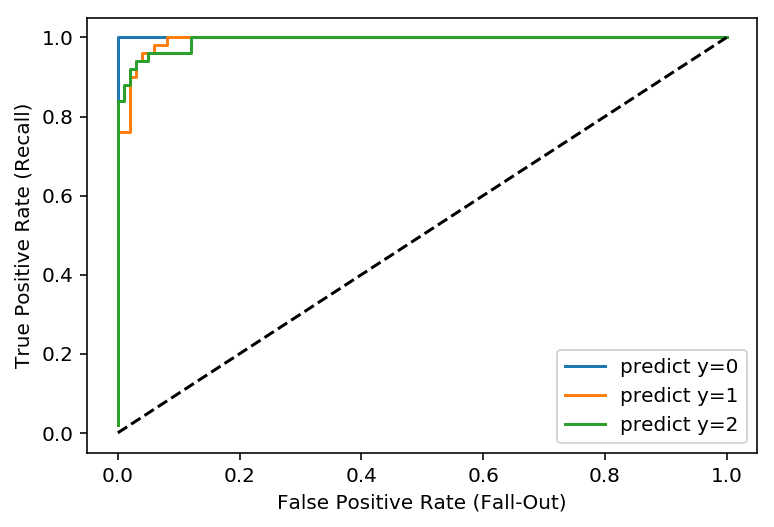

In [12]:
# ROC curve
import matplotlib.pylab as plt
plt.plot(fpr0, tpr0, label="predict y=0")
plt.plot(fpr1, tpr1, label="predict y=1")
plt.plot(fpr2, tpr2, label="predict y=2")
plt.legend()
plt.plot([0, 1], [0, 1], 'k--', label="random guess")
plt.xlabel('False Positive Rate (Fall-Out)')
plt.ylabel('True Positive Rate (Recall)')
plt.show()

In [13]:
# AUC (Area Under the Curve)
from sklearn.metrics import auc
auc(fpr0, tpr0), auc(fpr1, tpr1), auc(fpr2, tpr2)

(1.0, 0.9924, 0.9924000000000001)